<a href="https://colab.research.google.com/github/pgbeermann2017/MatrizDatos/blob/master/Grafica3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Fixing random state for reproducibility
np.random.seed(19680801)

url="https://raw.githubusercontent.com/pgbeermann2017/MatrizDatos/master/Matriz01.csv"
url="https://raw.githubusercontent.com/pgbeermann2017/MatrizDatos/master/MatrizInoculo.csv"
df1 = pd.read_csv(url)




xs = df1["pH"]
ys = df1["Inoculo"]
zs = np.array(df1["T"])
actividad=df1["Actividad"]


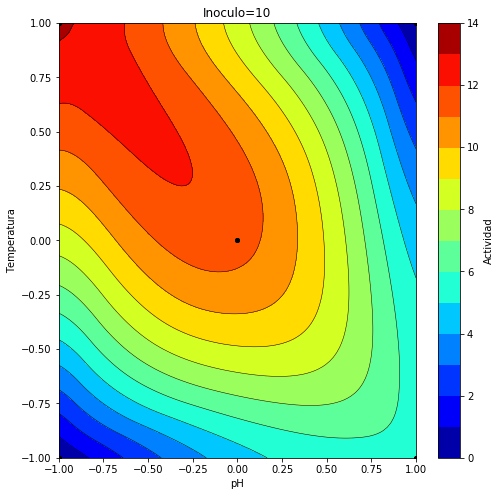

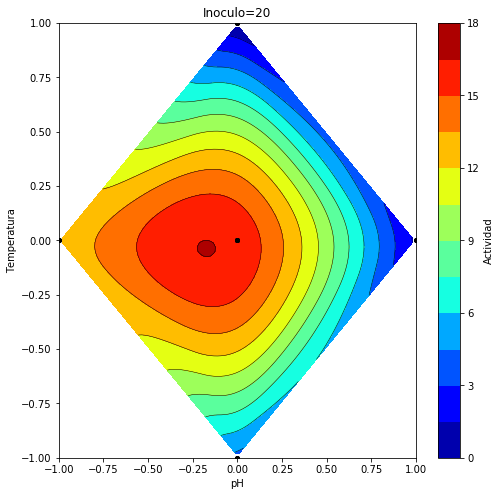

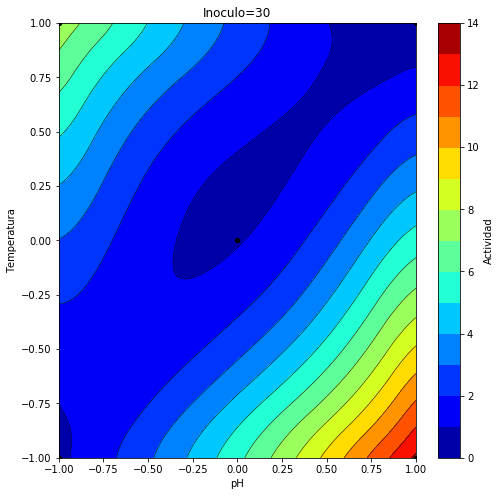

In [41]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy.ma as ma
from numpy.random import uniform, seed
# make up some randomly distributed data
seed(1234)

dict={"p1":[0,15,10],"p2":[15,33,20],"p3":[33,48,30]}
for s in dict:
  plt.figure(figsize=(8,8))
  p=s
  ini=dict[s][0]
  fin=dict[s][1]
  ino=dict[s][2]

  x = xs[ini:fin]
  y = zs[ini:fin]
  z = actividad[ini:fin]
  # define grid.
  xi = np.linspace(-1,1,100)
  yi = np.linspace(-1,1,100)
  # grid the data.
  zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')
  # contour the gridded data, plotting dots at the randomly spaced data points.
  CS = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
  CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
  plt.colorbar(label="Actividad") # draw colorbar
  # plot data points.
  plt.scatter(x,y,marker='o',c='black',s=15)
  plt.xlim(-1,1)
  plt.ylim(-1,1)
  plt.xlabel("pH")
  plt.ylabel("Temperatura")
  plt.title("Inoculo="+str(ino))
  plt.show()